## 1. Play the TicTacToe Game

In [37]:
import random
import pandas as pd
import numpy as np

In [38]:
class Game:
    def __init__(self, playerX, player0):
        self.board = [
            [None,None,None],
            [None,None,None],
            [None,None,None],
        ]
        self._playerX = playerX
        self._player0 = player0
        self.game_not_over = True
        self.current_player = playerX
    
    def run(self):
        while self.game_not_over:
            winner = self.make_move(self.board,self.current_player)
        return winner
    def get_winner(self,board):
        """Determines the winner of the given board.
        Returns 'X', 'O', or None."""
        #0~2 record 1~3 rows, 3~5 record 1~3 columns, 6,7 record crosses
        self.sameChessSum = [0 for i in range(8)]
        for i in range(3):
            for j in range(3):
                if board[j][i] == "X":
                    self.sameChessSum[j] += 1
                elif board[j][i]=="O":
                    self.sameChessSum[j] -=1

                if board[i][j] == "X":
                    self.sameChessSum[j+3] += 1
                elif board[i][j]=="O":
                    self.sameChessSum[j+3] -=1
            if board[i][i] == "X":
                self.sameChessSum[6] += 1
            elif board[i][i]=="O":
                self.sameChessSum[6]-=1

            if board[i][2 - i] == "X":
                self.sameChessSum[7] += 1
            elif board[i][2-i]=="O":
                self.sameChessSum[7]-=1
        if 3 in self.sameChessSum:
            return "X"
        elif -3 in self.sameChessSum:
            return "O"
        else:
            return None

    def other_player(self,player):
        """Given the character for a player, returns the other player."""
        if player==self._player0:
            return self._playerX
        elif player==self._playerX:
            return self._player0

    #transfer the game board format for output
    def getprintBoard(self,board): #变成字符输出
        outBoard="" #告诉python这个outboard要存储一个字符串
        for i in range(len(board)):
            outBoard+="".join([v if v is not None else "." for v in board[i]])+"\n" # “”.oin是把列表里所有的元素拼在一起
        return outBoard

    #format input
    def transferInput(self,instream): #把用户输入的字符串转换为系统能够识别的坐标
        try:
            x, y = map(int, instream.split(","))
        except:
            return -1,-1
        #Transfer input coordinate to list index
        return x, y

    #check transferred input
    def checkInput(self,x,y,board): #判断用户输入的坐标o不ok

        if not ((x in range(3)) and (y in range(3))):
            #print("Input a wrong coordinate, the input x,y both in range (1,3)!")
            return -1,-1
        elif board[x][y] is not None:
            #print("There already is a chess on that position!")
            return -1,-1
        else:
            return x,y
    #Get input in string format
    def getInput(self, instream,board):
        x, y = self.transferInput(instream)
        x, y = self.checkInput(x, y,board)
        return x,y

    #Perform a move on the board
    def moveChess(self, player,x,y,board):
        board[x][y]=player.name

    def make_move(self, board, current_player):
        # TODO: Show the board to the user.
        print(self.getprintBoard(board))
        # TODO: Input a move from the player.
        x, y = current_player.get_move(self)
        if x == -1:
            print("Please input a valid position!")
            return
        # TODO: Update the board.
        self.moveChess(current_player, x, y, board)
        # TODO: Update who's turn it is.
        winner = self.get_winner(board)
        if winner is None and any([v is None for row in self.board for v in row]):
            self.current_player = self.other_player(current_player)
        else:
            self.game_not_over = False
            if winner is not None:
                print("Player %s win!" % current_player.name)
                return winner
            else:
                print("Draw!")
                return winner
            print(self.getprintBoard(board))


In [39]:
class Human:
    def __init__(self, name):
        self.name = name

    def get_move(self,game):
        instream = input("Player{} please choose a position in format x,y to place chess:".format(self.name))
        x, y = game.getInput(instream, game.board)
        return x,y
    
    def __repr__(self):
        return str(self.name)

In [40]:
class Bot(Human):
    def __init__(self, name):
        super().__init__(name)

    def get_move(self,game):
        available_positions = [
            (i, j)
            for i in range(len(game.board))
            for j in range(len(game.board[i]))
            if game.board[i][j] is None
        ]
        return random.choice(available_positions)

In [48]:
games = pd.DataFrame(columns = [ 
  "Round",
  "Player 1",
  "Player 2",
  "Winner",
])
games

,Round,Player 1,Player 2,Winner


In [49]:
def add_game(player1,player2,winner): 
    games.loc[len(games)] = { 
        "Round":len(games)+1,
        "Player 1": player1,
        "Player 2": player2,
        "Winner":winner
    }

In [73]:
player1 = "X"
player2 = "O"

In [ ]:
game = Game(Human('X'),Bot('O'))
winner = game.run()
add_game(player1,player2,winner)

In [ ]:
games

In [ ]:
games.to_csv("./data.csv")

## 2. Draw the plot

In [149]:
data = pd.read_csv("/Users/mac/Desktop/data.csv")
data

,Unnamed: 0,Round,Player 1,Player 2,Winner
0,0,1,X,O,X
1,1,2,X,O,X
2,2,3,X,O,X
3,3,4,X,O,O
4,4,5,X,O,O
5,5,6,X,O,X
6,6,7,X,O,O
7,7,8,X,O,O
8,8,9,X,O,X
9,9,10,X,O,O


<AxesSubplot:xlabel='Round', ylabel='Winner'>

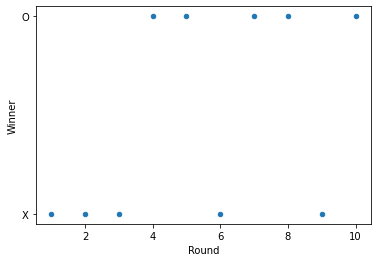

In [150]:
data.plot.scatter(x="Round",y="Winner")

In [171]:
data["Winner"].unique() 

array(['X', 'O'], dtype=object)

In [172]:
data["Winner"].value_counts()

X    5
O    5
Name: Winner, dtype: int64

In [173]:
counts = pd.DataFrame(columns = [ 
  "Player",
  "Winning_Counts",
])
counts

,Player,Winning_Counts


In [180]:
counts.loc[len(counts)] = {
    "Player": "X",
    "Winning_Counts":5,
}
counts.loc[len(counts)] = {
    "Player": "O",
    "Winning_Counts":5,
}
counts

,Player,Winning_Counts
0,X,5
1,O,5
2,X,5
3,O,5
4,X,5
5,O,5


<AxesSubplot:>

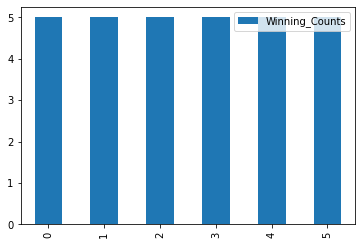

In [181]:
counts.plot(kind = "bar")

Text(0.5, 1.0, 'Winning Counts')

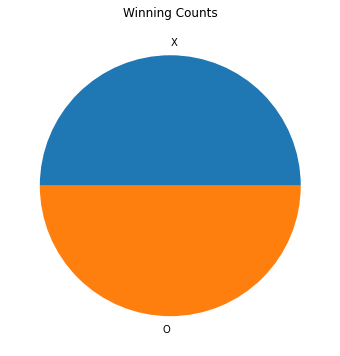

In [182]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
size = [5,5]
label = ['X','O']
plt.pie(size,labels=label)
plt.title('Winning Counts')